# Linear Regression and Gradient Descent 

## Linear Regression Model

The linear regression model is defined as:

$f_{w,b}(x) = wx + b$

Where:
- $w$ is the weight (slope)
- $b$ is the bias (y-intercept)
- $x$ is the input variable

## Cost Function

The cost function tells us how well the model is doing so that we can try to get it to do better.

The cost function $J_{w,b}$ is given by:

$J_{w,b} = \frac{1}{2m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})^2$

Where:
- $m$ is the number of training examples
- $x^{(i)}$ is the i-th input
- $y^{(i)}$ is the i-th target output

## Gradient Descent Algorithm

The gradient descent algorithm is used to minimize the cost function.

$w = w - α \frac{\partial}{\partial, w} J(w,b) $

$b = b - α \frac{\partial}{\partial, b} J(w,b) $

Where: 
- α is the learning rate 
- ∂/∂w J(w,b) is the partial derivative of J with respect to w
- ∂/∂b J(w,b) is the partial derivative of J with respect to b

The partial derivative is calculated as:

$\frac{\partial}{\partial w} J(w,b) = \frac{1}{m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}$

$\frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})$

These formulas are used to update the parameters w and b in each iteration of the gradient descent algorithm.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class LinearRegression: 
    def __init__(self, x_train, y_train, w_in=0, b_in=0):
        """
        Initializes the Linear Regression model with the training data and initial values for weights (w) and bias (b).

        Parameters:
        - x_train = Array of input features
        - y_train = Array of corresponding target values
        - w_in = Initial weight (default is 0)
        - b_in = Initial bias (default is 0)
        - m = Number of training examples

        """
        self.x_train = x_train
        self.y_train = y_train
        self.w_in = w_in
        self.b_in = b_in
        self.m = len(x_train) # Number of training examples

    def cost_function(self, w, b):
        """
        Computes the cost function for linear regression, which measures the difference between
        predicted values and actual values.

        The cost function used here is Mean Squared Error (MSE).

        Parameters:
        - w: Weight for the linear regression model.
        - b: Bias for the linear regression model.

        Returns:
        - The computed cost (MSE).
        """
        total_cost = 0

        # Sum of squared difeerences between predicted and actual values
        for i in range(self.m):
            y_predicted = w * self.x_train[i] + b
            total_cost += (y_predicted - self.y_train[i]) ** 2

        # Return the mean of the sqaured differences
        return (1 / (2 * self.m)) * total_cost
    
    def compute_prediction_array(self, w, b):
        """
        Computes the predicted values (y_hat) for the training set using the current weight and bias.

        Parameters:
        - w: Weight for the linear regression model.
        - b: Bias for the linear regression model.

        Returns:
        - An array of predicted values for each training example.
        """
        result = np.zeros(self.m)
        for i in range(self.m):
            result[i] = w * self.x_train[i] + b

        return result
    
    def gradient_w(self, w, b):
        """
        Computes the gradient of the cost function with respect to the weight (w).
        This gradient indicates how much the cost would change with a small change in the weight.

        Parameters:
        - w: Current weight value.
        - b: Current bias value.

        Returns:
        - The gradient value for the weight.
        """
        gradient_value = 0

        for i in range(self.m):
            y_predicted = w * self.x_train[i] + b
            gradient_value += (y_predicted - self.y_train[i]) * self.x_train[i]

        # Average gradient over all training examples
        return (1 / self.m) * gradient_value
    
    def gradient_b(self, w, b):
        """
        Computes the gradient of the cost function with respect to the bias (b).
        This gradient indicates how much the cost would change with a small change in the bias.

        Parameters:
        - w: Current weight value.
        - b: Current bias value.

        Returns:
        - The gradient value for the bias.
        """
        gradient_value = 0 

        for i in range(self.m):
            y_predicted = w * self.x_train[i] + b
            gradient_value += (y_predicted - self.y_train[i])

        # Average gradient over all training examples
        return (1 / self.m) * gradient_value
    
    def gradient_descent(self, iterations = 1200, learning_rate = 0.01):
        """
        Performs the gradient descent optimization to find the optimal values of weight (w) and bias (b)
        that minimize the cost function.

        Parameters:
        - iterations: Number of iterations to run the gradient descent (default is 1200).
        - learning_rate: Step size for each iteration of gradient descent (default is 0.01).

        Returns:
        - Optimized weight (w_optimised) and bias (b_optimised).
        """ 
        w_optimised = self.w_in  # Initialize the optimized weight with the initial value
        b_optimised = self.b_in  # Initialize the optimized bias with the initial value

        for i in range(iterations):
            # Compute gradients for weight and bias
            dj_dw = self.gradient_w(w_optimised, b_optimised)
            dj_db = self.gradient_b(w_optimised, b_optimised)

            # Update the weight and bias by moving in the opposite direction of the gradients
            temp_w = w_optimised - learning_rate * dj_dw
            temp_b = b_optimised - learning_rate * dj_db

            # Assign the updated values back to the optimized variables
            w_optimised = temp_w
            b_optimised = temp_b

            # Optional: Plot the prediction line during each iteration
            plt.plot(self.x_train, self.compute_prediction_array(w_optimised, b_optimised))

            # Print the progress every 100 iterations
            if i % 100 == 0:
                print(f"After {i} iterations: w -> {w_optimised},      b -> {b_optimised},       cost -> {self.cost_function(w_optimised, b_optimised)}")

        return w_optimised, b_optimised
    
    


After 0 iterations: w -> 6.5,      b -> 4.0,       cost -> 79274.8125
After 100 iterations: w -> 184.59679807363884,      b -> 112.40972211516156,       cost -> 86.84970508329027
After 200 iterations: w -> 190.7118836679377,      b -> 114.64573622598198,       cost -> 11.038223294493996
After 300 iterations: w -> 191.51943850078666,      b -> 113.71012918732391,       cost -> 9.479334741089724
After 400 iterations: w -> 192.12097808061574,      b -> 112.7481671541863,       cost -> 8.191983243496715
After 500 iterations: w -> 192.67562022511058,      b -> 111.85108446847413,       cost -> 7.079510310868737
After 600 iterations: w -> 193.19108900655777,      b -> 111.0170490787085,       cost -> 6.118111466142633
After 700 iterations: w -> 193.67027661837028,      b -> 110.24170756061314,       cost -> 5.287270767157324
After 800 iterations: w -> 194.1157405418912,      b -> 109.5209318015296,       cost -> 4.569258392878347
After 900 iterations: w -> 194.52985425962223,      b -> 108.8

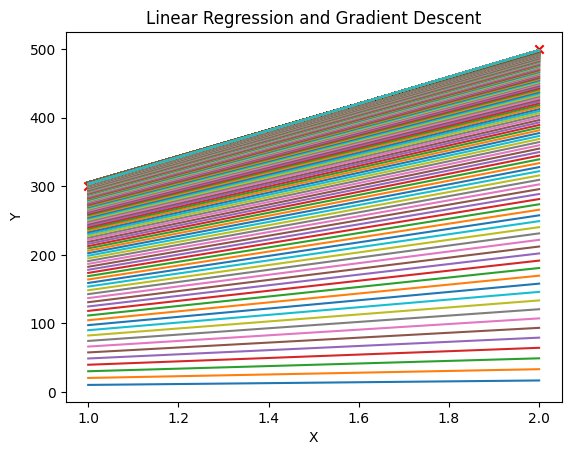

In [12]:
# Training data
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

# Initialize the Linear Regression model
model = LinearRegression(x_train, y_train)

# Perform gradient descent to find the optimal weight and bias
w, b = model.gradient_descent(iterations=1000, learning_rate=0.01)

# Scatter plot of the training data
plt.scatter(x_train, y_train, marker = "x", color = "red")
# Set the title
plt.title("Linear Regression and Gradient Descent")
# Set the y-axis label
plt.ylabel("Y")
# Set the x-axis label
plt.xlabel("X")

# Display the final optimized weight and bias
print(f"w -> {w},    b -> {b}")

# Show the plot
plt.show()